In [5]:
# Add the parent directory to the path so that we can import the src module
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [58]:
from src.camera import intrinsic_matrix, camera
from src.pose.position_estimation import PositionEstimation
from src.pingpong import ball
import numpy as np

In [59]:
import cv2 as cv
img = cv.imread("chessprinting2.png")

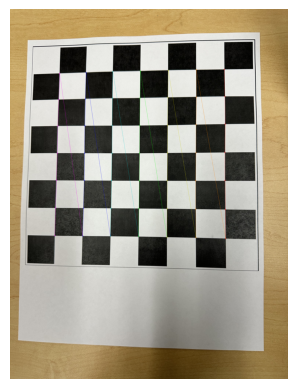

Intrinsic Matrix (Camera Matrix):
 [[2.34065029e+03 0.00000000e+00 1.50078994e+03]
 [0.00000000e+00 2.33198324e+03 2.05112279e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [60]:
calibration = intrinsic_matrix.find_intrinsic_matrix(img)

In [61]:
calibration.intrinsic_matrix

array([[2.34065029e+03, 0.00000000e+00, 1.50078994e+03],
       [0.00000000e+00, 2.33198324e+03, 2.05112279e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

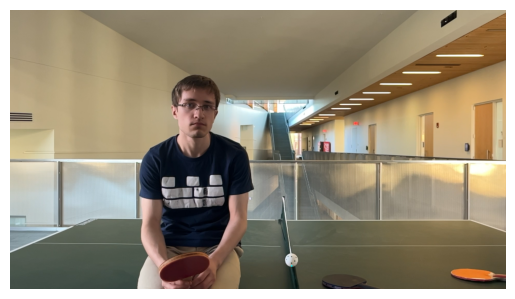

In [62]:
import matplotlib.pyplot as plt

# Load the image
ball_img = cv.imread("slowmoframe.png")

# Choose a pixel coordinate (for example, (100, 200))
chosen_pixel = (1090, 990)

# Draw a green dot on the chosen pixel
ball_img_with_dot = ball_img.copy()
cv.circle(ball_img_with_dot, chosen_pixel, 3, (255, 255, 0), -1)  # Draw a green dot with radius 3 pixels

# Convert the image from BGR to RGB (Matplotlib expects RGB)
ball_img_with_dot_rgb = cv.cvtColor(ball_img_with_dot, cv.COLOR_BGR2RGB)

# Display the image with the green dot
plt.imshow(ball_img_with_dot_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

In [63]:
ballcenter = np.array([1090,967])
d_pix = 46

In [64]:
cam = Camera(None, None, calibration, None)


In [66]:
est = PositionEstimation(cam, ball.BallConstants())

In [67]:
est.ball_position_camera_reference_frame(1090,967,46)

array([-0.35720864,  0.94621916,  2.03534807])